<a href="https://colab.research.google.com/github/Ribeirotmr/Iniciacao-Cientifica/blob/main/Qiskit_TFQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Fourier Quântica

---

[Fassarella.net](https://fassarella.net)

---
Qiskit:
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
*   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
---

Python:
*   [LearningPython](https://https://www.learnpython.org/)
*   [W3Schools](https://www.w3schools.com/python/)


# <font color="red">**Transformada de Fourier Quântica**</font>

**Fatos básicos**:
*	A TFQ consiste em uma implementação da *Transformada de Fourier Discreta*:
$$
f: \mathbb{C}^{\times N} \rightarrow \mathbb{C}^{\times N},\ \mathbf{y} = f(\mathbf{x}) \leadsto y_j = \sum_{k=0}^{N-1} e^{-2\pi i \frac{kj}{N}}x_k.
$$
*	A TFQ é muito similar à transformada de Hadamard, com a diferença essencial sendo a introdução de fases:
$$
\begin{split}
H_n: \mathcal{H}_2^{\otimes n} \rightarrow \mathcal{H}_2^{\otimes n},\ H_n |x_{n-1\dots x_1x_0} \rangle &= (H|x_{n-1}\rangle) \otimes \dots \otimes (H|x_1\rangle) \otimes (H|x_0\rangle)\\
&=(|0 \rangle + (-1)^{x_n})|1\rangle \otimes \dots \otimes (|0 \rangle + (-1)^{x_1})|1\rangle \otimes (|0 \rangle + (-1)^{x_0})|1\rangle)\\
&=...
\end{split}
$$


**Definição de TFQ**: Para $n \in \mathbb{N},\ N = 2^n$

$$
F_n: \mathcal{H}_2^{\otimes n} \rightarrow \mathcal{H}_2^{\otimes n},\ F_n|x\rangle:= |y\rangle,
$$
onde:
$$
|x\rangle = \sum_{k=0}^{2^n-1} x_k | k \rangle \leadsto |y \rangle = \sum_{j=0}^{2^n-1} y_j | j \rangle
$$
e
$$
y_j = \frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1} e^{2\pi i \frac{kj}{2^n}}x_k.
$$
Destacam-se as diferenças com a *transformada de fourier discreta*:
*   sinal positivo nos expoentes e
*   fator de normalização.

<font color="gray">**TFQ na base computacional**: a TFQ de um estado da base computacional resulta em uma superposição uniforme de todos os estados da base computacional:
$$
F_n| k '
$$
A medida de $F_n| k \rangle $ na base computacional tem probabilidade igual a $1/2^n$ de resultar em qualquer um dos estados $|j\rangle$:
$$
\langle j | F_n | k\rangle = \left|  \frac{e^{2\pi i \frac{jk}{2^n}}}{\sqrt{2^n}} \right|^2 = \frac{1}{2^n},\ \ \ \forall k, j \in \left\lbrace 0,1, \dots, 2^n-1 \right\rbrace.
$$
></font>

**Propriedades**

*   **A TFQ é uma transformação unitária** com matriz na base computacional dada por:
$$
[F_n] = \frac{1}{\sqrt{2^n}}\begin{pmatrix}
1 & 1 & 1 & 1 &\dots & 1\\
1 & \omega & \omega^2 & \omega^3 & \dots & \omega^{2^n-1}\\
1 & \omega^2 & \omega^4 & \omega^6 & \dots & \omega^{2(2^n-1)}\\
1 & \omega^3 & \omega^6 & \omega^9 & \dots & \omega^{3(2^n-1)}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & \omega^{2^n-1} & \omega^{2(2^n-1)} & \omega^{3(2^n-1)} & \dots & \omega^{(2^n-1)\times (2^n-1)}
\end{pmatrix},
$$
onde
$$
w = e^{2 \pi i/2^n}.
$$


In [ ]:
'''
Matriz da TQF_n
'''



# QISKIT: Carregamento

*   Qiskit: *How Can I Convert a Unitary Matrix to a set of One & Two Qubit Gates? 1 Minute Qiskit*. [https://youtu.be/O2WcZS4yO1Q?si=4qpTA_OUIg4PYeYF](https://youtu.be/O2WcZS4yO1Q?si=4qpTA_OUIg4PYeYF).
*   Qiskit: *How can I create a custom gate from a matrix? 1 Minute Qiskit*. [https://youtu.be/zFgyMGklANM?si=dqdmuf3S2xKURiFq](https://youtu.be/zFgyMGklANM?si=dqdmuf3S2xKURiFq).

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ibm-runtime

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 13.9 MB/s eta 0:00:00


'1.3.0'

In [ ]:
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=cd90b060ae848cdfa7daf360eb214166135e14048942eba9a2f0a95e61d516c7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

In [ ]:
# Acesso à IBM

from qiskit_ibm_runtime import QiskitRuntimeService

IBMToken_Thierry = "SUA CHAVE DE ACESSO"
QiskitRuntimeService.save_account(
channel = 'ibm_quantum',
token = IBMToken_Thierry,
overwrite=True
)

# Processadores disponíveis

service = QiskitRuntimeService()
print("Backends disponíveis:")
display(service.backends())

# Backend
service = QiskitRuntimeService(channel="ibm_quantum")

'''
Backend com menor número de jobs em execução
'''
backend = service.least_busy(operational=True, simulator=False)

'''
Backend personalizado
'''
#backend = service.backend(name="ibm_brisbane")

print("Backend:")
display(backend.name)

Backends disponíveis:


[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Backend:


'ibm_brisbane'

# Matriz da TFQ

Definições da matrix da TFQ no Sympy e no Numpy

## Sympy

In [ ]:
'''
Matrizes no Sympy

    > Multiplicação de Matrizes: *
    > Transposição de M........: M.T
    > Conjugado complexo de M..: M.conjugate()
    > Adjunta de M.............: M.adjoint() = M.conjugate().T
'''

from sympy import *

from sympy.physics.quantum import TensorProduct

from sympy import I, pi, sqrt, sin, cos, exp

a, b, c = symbols("a b c")
th, ph, la, ga, al, be, de = symbols("theta phi lambda gamma alpha beta delta")
# th1, ph1, la1, ga1, al1, be1, de1 = symbols("theta_1 phi_1 lambda_1 gamma_1 alpha_1 beta_1 delta_1")
# th2, ph2, la2, ga2, al2, be2, de2 = symbols("theta_2 phi_2 lambda_2 gamma_2 alpha_2 beta_2 delta_2")
# th3, ph3, la3, ga3, al3, be3, de3  = symbols("theta_3 phi_3 lambda_3 gamma_3 alpha_3 beta_3 delta_3")

def spTFQ(n = 'int'):
    '''
    Função que gera a matriz da TFQ de um dado número de qubits

    arg:
        n = número de qubits (inteiro positivo)

    ret:
        M = matriz da TFQ para um dado número de qubits, no formato do Sympy
    '''
    d = 2**n
    w = exp(2j * pi / d)
    M = zeros(d,d)
    for k in range(d):
        for j in range(d):
            M[k,j] = w**(k * j)
    return M/sqrt(d)

In [ ]:
# Teste
n = 2
display(spTFQ(n))

# TFQ(n) multiplicada por sua adjunta:

spTFQ_adjunta = spTFQ(n).conjugate().T # Conjugada complexa da matriz transposta
Produto = spTFQ(n)*spTFQ_adjunta
Produto.evalf()

Matrix([
[1/2,             1/2,             1/2,             1/2],
[1/2, exp(0.5*I*pi)/2, exp(1.0*I*pi)/2, exp(1.5*I*pi)/2],
[1/2, exp(1.0*I*pi)/2, exp(2.0*I*pi)/2, exp(3.0*I*pi)/2],
[1/2, exp(1.5*I*pi)/2, exp(3.0*I*pi)/2, exp(4.5*I*pi)/2]])

Matrix([
[                              1.0,               0.e-140 + 0.e-143*I, 0.e-139 + 3.04609605455074e-141*I,               0.e-140 - 0.e-143*I],
[              0.e-140 - 0.e-143*I,                               1.0,               0.e-140 + 0.e-143*I, 0.e-139 + 3.04609605455074e-141*I],
[0.e-139 - 3.04609605455074e-141*I,               0.e-140 - 0.e-143*I,                               1.0,               0.e-140 + 0.e-143*I],
[              0.e-140 + 0.e-143*I, 0.e-139 - 3.04609605455074e-141*I,               0.e-140 - 0.e-143*I,                               1.0]])

## Numpy

In [ ]:
'''
Matrizes no Numpy

    > Multiplicação de Matrizes: @ ou .dot(): M1@M2 ou M1.dot(M2)
    > Transposição de M........: M.T
    > Conjugado complexo de M..: M.conjugate()
    > Adjunta de M.............: M.conjugate().T
'''

import numpy as np
from numpy import pi, exp, sqrt
from numpy import array, ndarray

def npTFQ(n = 'int'):
    '''
    Função que gera a matriz da TFQ de um dado número de qubits

    arg:
        n = número de qubits (inteiro positivo)

    ret:
        M = matriz da TFQ para um dado número de qubits, no formato do Sympy
    '''
    d = 2**n
    w = np.exp(2*1j * np.pi / d)
    M = np.zeros((d,d), dtype = complex) # Duplo parêntesis!
    for k in range(d):
        for j in range(d):
            M[k,j] = w**(k * j)
    return M/sqrt(d)

In [ ]:
# Teste
n = 2
display(npTFQ(n))

# TFQ(n) multiplicada por sua adjunta:

npTFQ_adjunta = npTFQ(n).conjugate().T # Conjugada complexa da matriz transposta
Produto = npTFQ(n)@npTFQ_adjunta
Produto

array([[ 5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j,
         5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j],
       [ 5.00000000e-01+0.0000000e+00j,  3.06161700e-17+5.0000000e-01j,
        -5.00000000e-01+6.1232340e-17j, -9.18485099e-17-5.0000000e-01j],
       [ 5.00000000e-01+0.0000000e+00j, -5.00000000e-01+6.1232340e-17j,
         5.00000000e-01-1.2246468e-16j, -5.00000000e-01+1.8369702e-16j],
       [ 5.00000000e-01+0.0000000e+00j, -9.18485099e-17-5.0000000e-01j,
        -5.00000000e-01+1.8369702e-16j,  2.75545530e-16+5.0000000e-01j]])

array([[ 1.00000000e+00+0.00000000e+00j, -4.59242550e-17-5.55111512e-17j,
         0.00000000e+00-6.12323400e-17j,  8.22616137e-17-8.32667268e-17j],
       [-4.59242550e-17+5.55111512e-17j,  1.00000000e+00+0.00000000e+00j,
        -4.30636606e-17-3.34767643e-17j,  0.00000000e+00-6.12323400e-17j],
       [ 0.00000000e+00+6.12323400e-17j, -4.30636606e-17+3.34767643e-17j,
         1.00000000e+00+0.00000000e+00j, -2.10292737e-17-4.97899625e-17j],
       [ 8.22616137e-17+8.32667268e-17j,  0.00000000e+00+6.12323400e-17j,
        -2.10292737e-17+4.97899625e-17j,  1.00000000e+00+0.00000000e+00j]])

# 2Qubit

In [ ]:
qubits = [k for k in range(10)]
qubits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

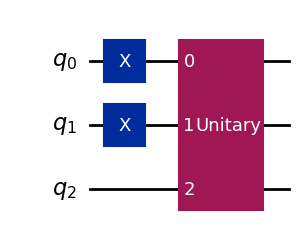

In [ ]:
'''
QFT 3 Qubits
'''
import numpy as np
from  numpy import pi, exp

n = 3
qubits = [k for k in range(n)]
QFT2 = npTFQ(n)

qc = QuantumCircuit(n)
qc.x(0) # <- preparação do estado inicial (x(0) prepara o estado |001>)
qc.x(1) # <- preparação do estado inicial (x(0) prepara o estado |011>)
qc.unitary(QFT2,qubits)
qc.draw('mpl')

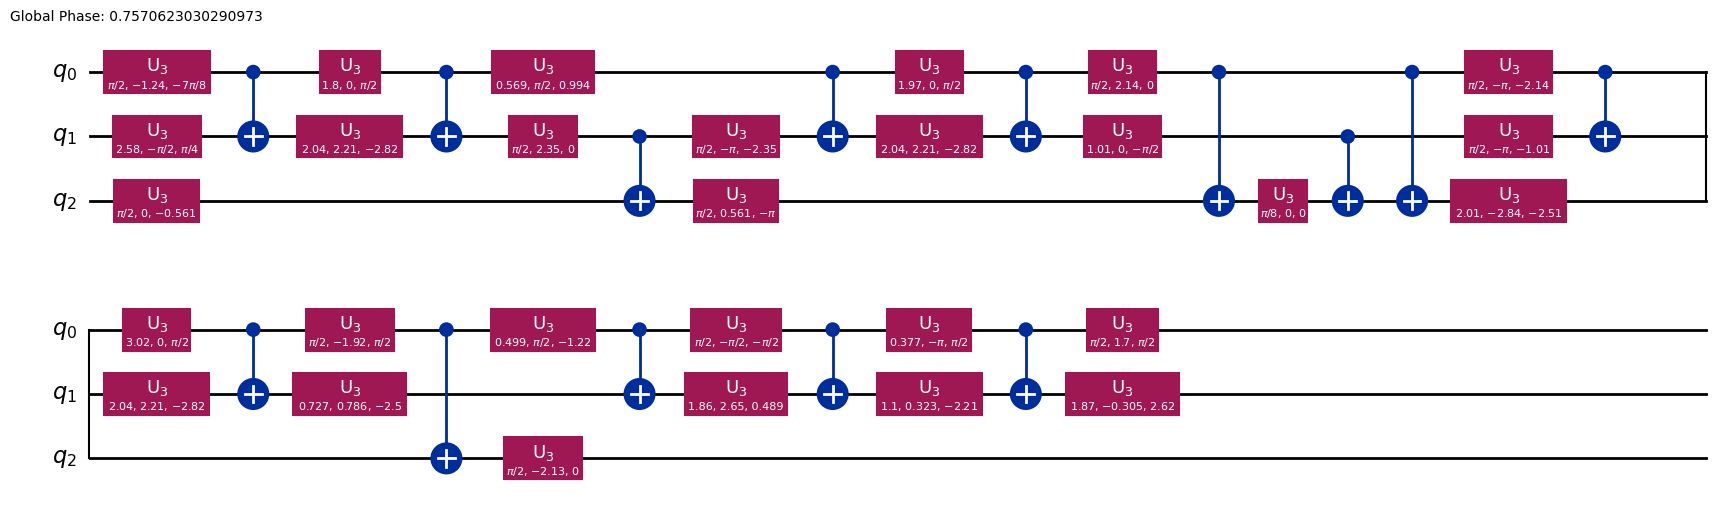

In [ ]:
from qiskit import transpile

qc_trans = transpile(qc, basis_gates = ['cx','cy','u3'])
qc_trans.draw('mpl')

# TESTES

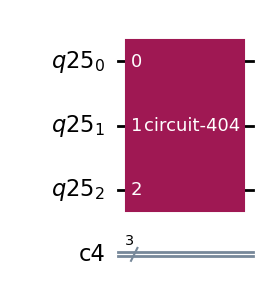

Estadovetor:
Statevector([ 3.53553391e-01+3.52495810e-15j,
             -2.50000000e-01+2.50000000e-01j,
              7.21644966e-15-3.53553391e-01j,
              2.50000000e-01+2.50000000e-01j,
             -3.53553391e-01-4.96824804e-15j,
              2.50000000e-01-2.50000000e-01j,
             -1.19348975e-15+3.53553391e-01j,
             -2.50000000e-01-2.50000000e-01j],
            dims=(2, 2, 2))
Estadovetor em formato latex:


<IPython.core.display.Latex object>

{'000': 1024}

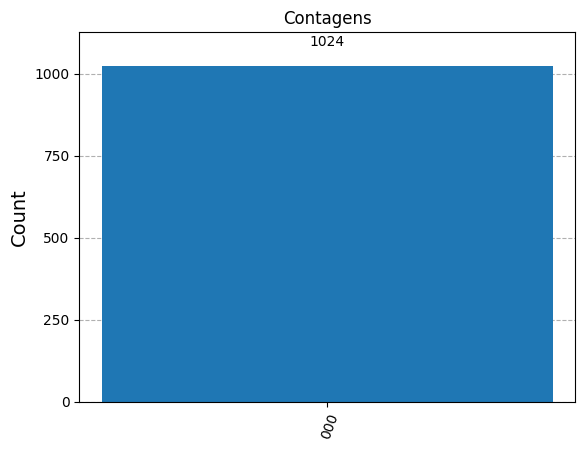

In [ ]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
teste = QuantumCircuit(q,c)
teste.append(qc_trans,qubits)
display(teste.draw('mpl'))

# Simulador e transpilação
from qiskit_aer import AerSimulator
simulator = AerSimulator()

# Estado gerado pelo circuito
teste.save_statevector() # Armazenamento do estadovetor

# Simulador e transpilação
simulator = AerSimulator(method='statevector') # <-- ATENÇÃO ao método
teste_t = transpile(teste, simulator)

# Simulação e estadovetor
result = simulator.run(teste_t).result()
statevector = result.get_statevector(teste_t)
print("Estadovetor:")
print(statevector)

# Impressão do estado no formato Latex
from qiskit.visualization import array_to_latex
print("Estadovetor em formato latex:")
display(array_to_latex(statevector, precision=10, prefix='', source=False, max_size=8))

# Plotagem dos coeficientes do estado vetor
plot_state_city(statevector, title='TFQ')

# Simulação e contagem
result = simulator.run(teste_t, shots = 2**10).result()
#display(result)

# Plotagem do histograma das estatísticas
counts = result.get_counts(teste_t)
display(counts)
plot_histogram(counts, title='Contagens')